In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('max_rows', 999)
pd.set_option('max_columns', 999)
pd.set_option('display.max_colwidth',999)

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning and Imputing

In [8]:
100*df.isnull().sum()/len(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [9]:
# Lets check the highest missing percentage columns.
# On reviewing the data dictionary columns - MiscFeature , Fence , PoolQc and Alley are meaningfull missing values but 
#they are also highly skewed so we will drop them instead of imputing.

### Dropping coulmns which have 80% or above missing values.

In [10]:
 df = df.loc[:, df.isnull().sum() < 0.8*df.shape[0]]

In [11]:
100*df.isnull().sum()/len(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

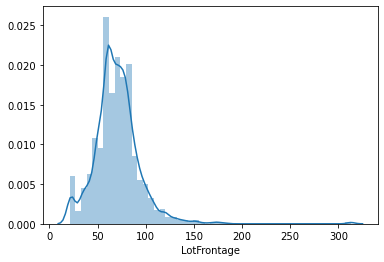

In [12]:
sns.distplot(df['LotFrontage'])

In [13]:
df['LotFrontage'].mean()

70.04995836802665

In [14]:
df['LotFrontage'].median()

69.0

In [15]:
# its our choice to impute with mean/median as difference is very low , we will impute with median as it is more robust technique
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [16]:
df['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [17]:
#Checking the skewness
df['FireplaceQu'].value_counts(normalize=True)

No Fireplace    0.472603
Gd              0.260274
TA              0.214384
Fa              0.022603
Ex              0.016438
Po              0.013699
Name: FireplaceQu, dtype: float64

It seems alright

In [18]:
#Now We have handled high percentage missing values lets move on to other columns
100*df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

### BsmtQual ,BsmtCond ,BsmtExposure, BsmtFinType1, BsmtFinType2 will be imputed as no basement according to data dictionary

In [19]:
df['BsmtQual'] = df.BsmtQual.fillna('No Basement')
df['BsmtCond'] = df.BsmtCond.fillna('No Basement')
df['BsmtExposure'] = df.BsmtExposure.fillna('No Basement')
df['BsmtFinType1'] = df.BsmtFinType1.fillna('No Basement')
df['BsmtFinType2'] = df.BsmtFinType2.fillna('No Basement')

### Same with garage except garageyearbuilt

In [20]:
df['GarageType'] = df.GarageType.fillna('No Garage')
df['GarageFinish'] = df.GarageFinish.fillna('No Garage')
df['GarageQual'] = df.GarageQual.fillna('No Garage')
df['GarageCond'] = df.GarageCond.fillna('No Garage')

In [21]:
# Lets check the missing values again
100*df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [22]:
df['Electrical'].value_counts(normalize=True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

In [23]:
df['Electrical'].fillna('SBrkr',inplace=True)

### Electrical is a highly skewed column. We will remove all the skewed columns later in the notebook so lets move on.

In [24]:
df.MasVnrType.value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

### Filling Nan with None as it is mode.

In [25]:
df.MasVnrType.fillna('None',inplace=True)

In [26]:
df['MasVnrArea'].value_counts(normalize=True)

0.0       0.592975
72.0      0.005510
180.0     0.005510
108.0     0.005510
120.0     0.004821
16.0      0.004821
80.0      0.004132
200.0     0.004132
106.0     0.004132
340.0     0.004132
170.0     0.003444
132.0     0.003444
360.0     0.003444
84.0      0.003444
320.0     0.003444
100.0     0.002755
196.0     0.002755
246.0     0.002755
216.0     0.002755
160.0     0.002755
183.0     0.002755
178.0     0.002755
270.0     0.002755
300.0     0.002755
210.0     0.002755
268.0     0.002755
252.0     0.002755
168.0     0.002755
336.0     0.002755
220.0     0.002755
76.0      0.002755
288.0     0.002755
456.0     0.002755
40.0      0.002755
50.0      0.002066
130.0     0.002066
82.0      0.002066
208.0     0.002066
90.0      0.002066
70.0      0.002066
44.0      0.002066
420.0     0.002066
99.0      0.002066
110.0     0.002066
104.0     0.002066
85.0      0.002066
272.0     0.002066
226.0     0.002066
174.0     0.002066
240.0     0.002066
186.0     0.002066
169.0     0.002066
148.0     0.

### Filling Nan with 0 in this case as we are assuming that there is no MasVnr.

In [27]:
df['MasVnrArea'] = df.MasVnrArea.fillna(0)

In [28]:
print(df['GarageYrBlt'].mean())
print(df['GarageYrBlt'].median())

1978.5061638868744
1980.0


### Filling Nan with meadian as its more robust , even though Nan here means No Garage but since its numerical column we are imputing with median.

In [29]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)

In [30]:
100*df.isnull().sum()/len(df)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

### Now our data has no missing values. Lets check the data types.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### There are some columns which have discrete values but are considered as numerical we will convert them to categorical type.

In [32]:
df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','MSSubClass'
   ,'Fireplaces','GarageCars','OverallQual','OverallCond']] = df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                                                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','MSSubClass'
   ,'Fireplaces','GarageCars','OverallQual','OverallCond']].astype(object)

# Converting Years column into age

In [33]:
df['YearBuilt'] = 2020-df['YearBuilt']
df['YearRemodAdd'] = 2020-df['YearRemodAdd']
df['GarageYrBlt'] = 2020 - df['GarageYrBlt']
df['YrSold'] = 2020 - df['YrSold']

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,17.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,12,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,44.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,13,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,19.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,12,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,22.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,14,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,20.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,12,WD,Normal,250000


In [35]:
# MoSold i.e month sold doesnt provide any valuable information and it will result in high number of categorical variable
# so we will drop it.
df.drop('MoSold',1,inplace=True)

In [36]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,17.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,12,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,44.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,13,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,19.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,12,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,22.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,14,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,20.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000


Our Data Cleaning and Engineering Done.

# EDA

### First Lets Check the Skewness in Categorical columns and we will drop them.

In [37]:
cat = df.select_dtypes(include='object')

In [38]:
for i in cat.columns:
    print(df[i].value_counts(normalize=True))
    print('...........................................')

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
...........................................
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
...........................................
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
...........................................
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
...........................................
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
...........................................
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
...........................................
Inside  

### There are quite a few skewed columns

In [39]:
cat.skew(axis=0)

MSSubClass      1.407657
OverallQual     0.216944
OverallCond     0.693067
BsmtFullBath    0.596067
BsmtHalfBath    4.103403
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
KitchenAbvGr    4.488397
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageCars     -0.342549
dtype: float64

In [40]:
df['BsmtHalfBath'].value_counts(normalize=True)

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

In [41]:
df['KitchenAbvGr'].value_counts(normalize=True)

1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64

We will drop these columns

Street, Utilities , LandSlope , RoofMatl , Heating , CentralAir, Electrical , PavedDrive ,BsmtHalfBath , KitchenAbvGr,Condition2,Functional,LandContour,GarageCond,GarageQual ,BsmtCond
these are the columns which have a variable domination of 89.97 % and higher so we will drop them since its doesnt give much information and have high skew.

In [42]:
df = df.drop(['Street','Utilities', 'LandSlope' , 'RoofMatl' , 'Heating' , 'CentralAir', 'Electrical' ,
              'PavedDrive' ,'BsmtHalfBath' , 'KitchenAbvGr','Condition2','Functional','LandContour',
             'GarageQual','GarageCond','BsmtCond'],axis=1)

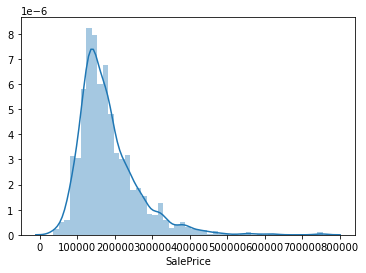

In [43]:
# Lets check the SalePrice Distribution
sns.distplot(df['SalePrice'])

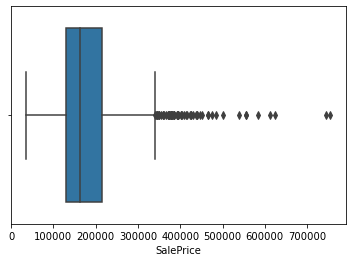

In [44]:
sns.boxplot(x='SalePrice',data=df)

It is right skewed and has outliers. But these values are important for us so we cant drop or cap them.

In [45]:
df['SalePrice'] = np.log(df['SalePrice'])

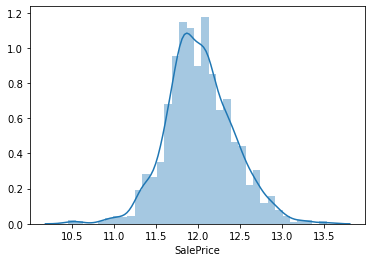

In [46]:
# Lets Check the plot again. Did it fixed our problem?
sns.distplot(df['SalePrice'])

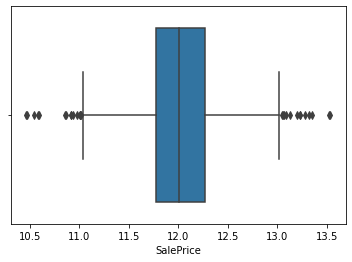

In [47]:
sns.boxplot(x='SalePrice',data=df)

Yup!!! Its Fixed.

In [48]:
df.shape

(1460, 60)

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,17,17,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,17.0,RFn,2,548,0,61,0,0,0,0,0,12,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,44,44,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,44.0,RFn,2,460,298,0,0,0,0,0,0,13,WD,Normal,12.109011
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,19,18,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,19.0,RFn,2,608,0,42,0,0,0,0,0,12,WD,Normal,12.317167
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,105,50,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,22.0,Unf,3,642,0,35,272,0,0,0,0,14,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,20,20,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,20.0,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,12.429216


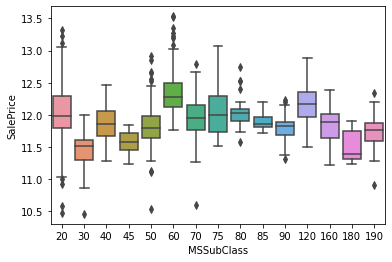

In [50]:
sns.boxplot(x='MSSubClass' , y = 'SalePrice' , data =df)
plt.show()

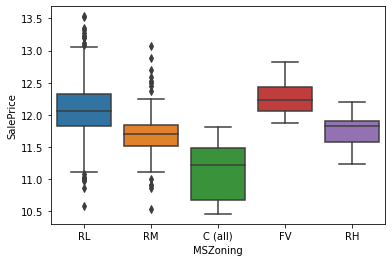

In [51]:
sns.boxplot(x='MSZoning' , y = 'SalePrice' , data =df)
plt.show()

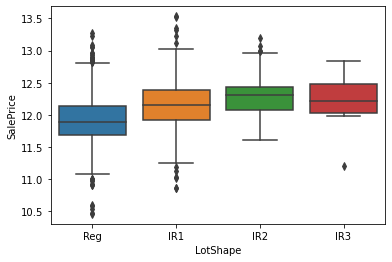

In [52]:
sns.boxplot(x='LotShape' , y = 'SalePrice' , data =df)
plt.show()

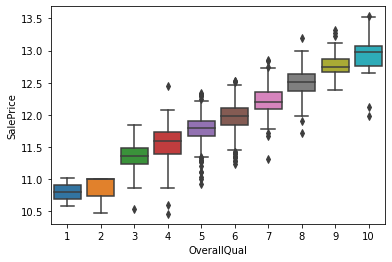

In [53]:
sns.boxplot(x='OverallQual' , y = 'SalePrice' , data =df)
plt.show()

Its not surprising that highest quality house fetches high price.

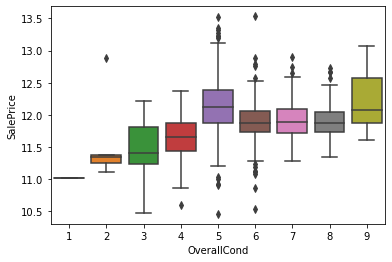

In [54]:
sns.boxplot(x='OverallCond' , y = 'SalePrice' , data =df)
plt.show()

But here its surprising Condition 5 fetched higher price than Condition 9.

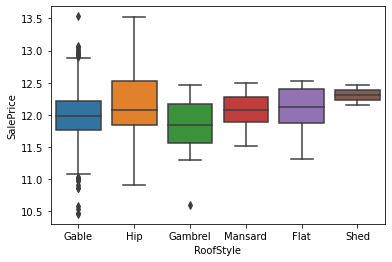

In [55]:
sns.boxplot(x='RoofStyle' , y = 'SalePrice' , data =df)
plt.show()

Does RoofStyle Effects SalesPrice?
All roof style have around equal median values. Although Gable do have High price sales but it also have very low price sale
we can assume this type of behaviour occur because majority of house have Gable type Roofs.

Do People tend to focus on Basement Height when they buy houses?

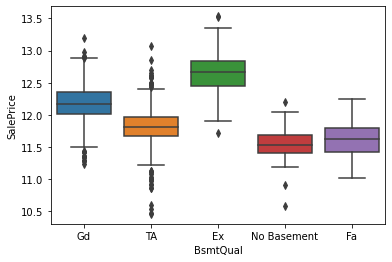

In [56]:
sns.boxplot(x='BsmtQual' , y = 'SalePrice' , data =df)
plt.show()

Yes . But Good And Average height basements giving close competition to Excellent category in top price category but they do lose on low price range.

Foundation Of house

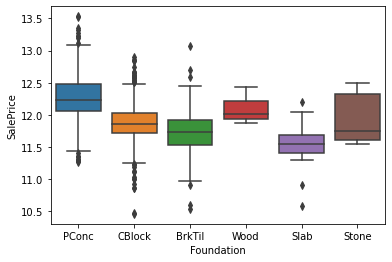

In [57]:
sns.boxplot(x='Foundation' , y = 'SalePrice' , data =df)
plt.show()

PConc is our winner. Do customers care about it or is it builders preference?

Neighborhood Everybody wants to live in good neighborhood. Lets see

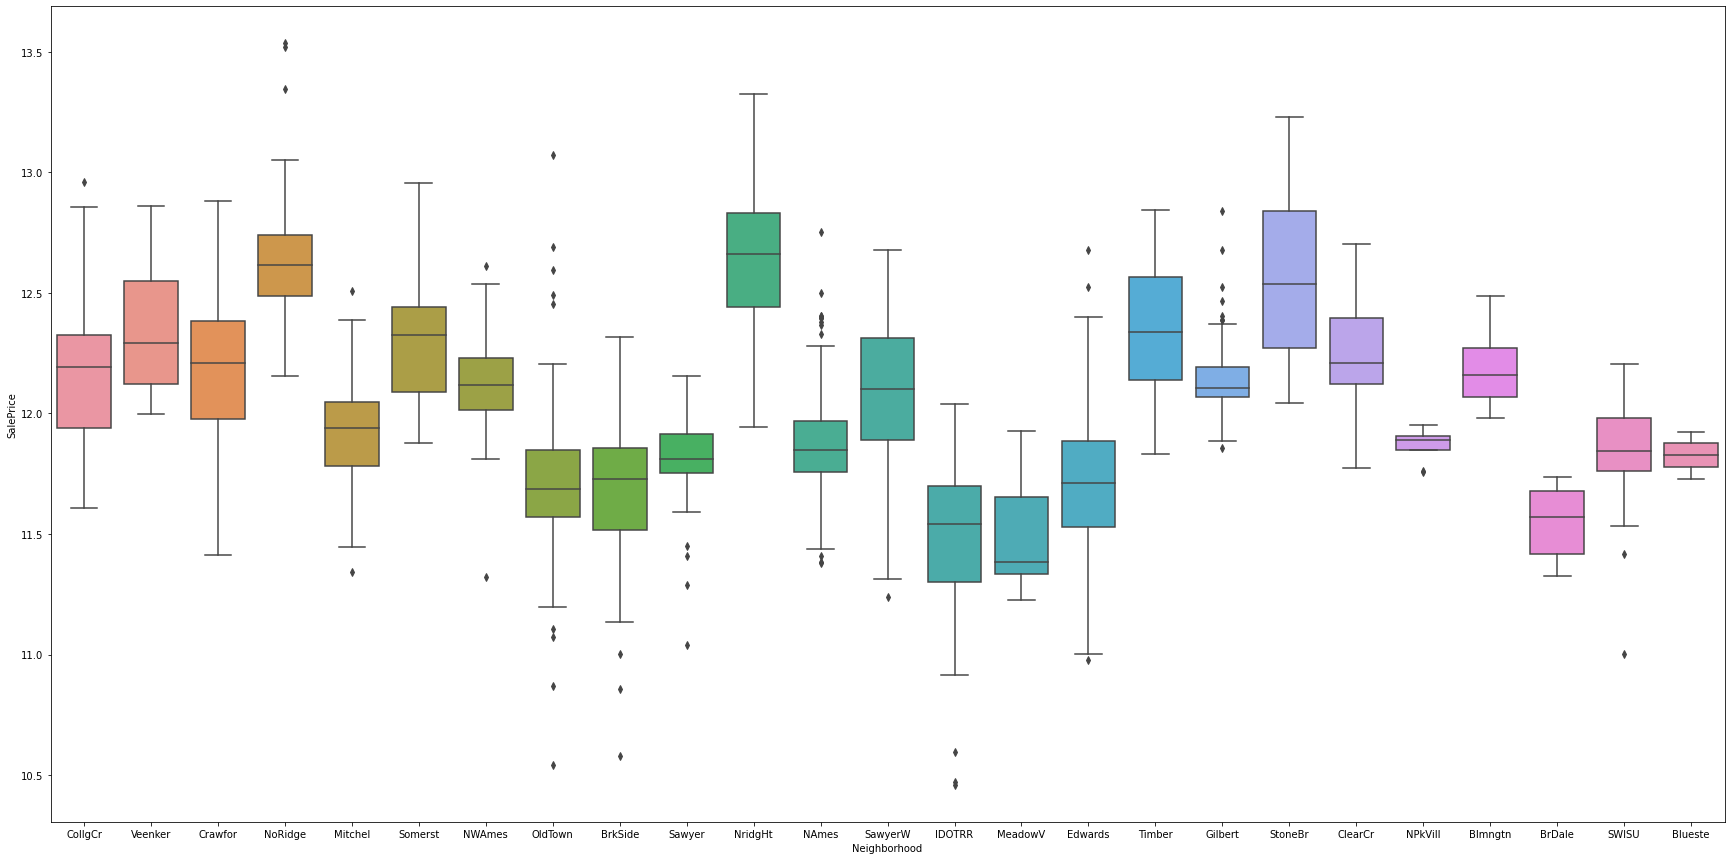

In [58]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Neighborhood' , y = 'SalePrice' , data =df)
plt.show()

Personally dont know about neighborhood in area but from this data i safely say that i would like to live in NridgHt or StoneBr

House Style

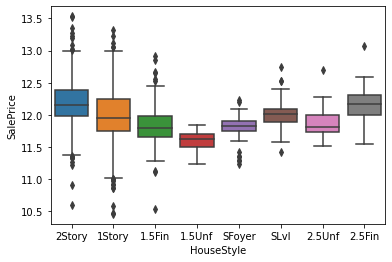

In [59]:
sns.boxplot(x='HouseStyle' , y = 'SalePrice' , data =df)
plt.show()

2 Story did fetched highest price even on low spectrum vs 1 story.

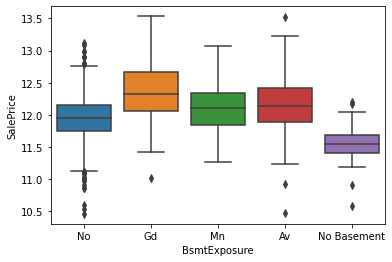

In [60]:
sns.boxplot(x='BsmtExposure' , y = 'SalePrice' , data =df)
plt.show()

Good Exposure is winner , but No exposure did fetched some of the highest priced sale. I guess no body is sunbathing in basement. Clearly No exposure is better than no Basement

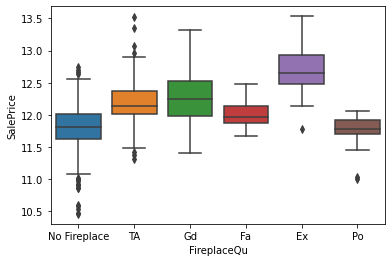

In [61]:
sns.boxplot(x='FireplaceQu' , y = 'SalePrice' , data =df)
plt.show()

Excellent Fireplace is winner but Average and Good are not far behind.
No Fireplace fetched one of the lowest sell price but it also did better than poor fireplace in top spectrum.
- Is No Fireplace is better than poor?

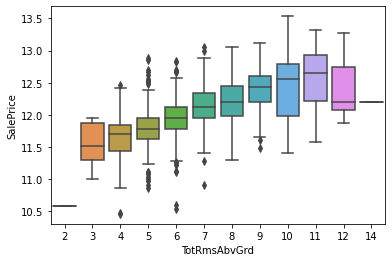

In [62]:
sns.boxplot(x='TotRmsAbvGrd' , y = 'SalePrice' , data =df)
plt.show()

There is increase in price as Rooms increases. But then it decreases after a certain point.

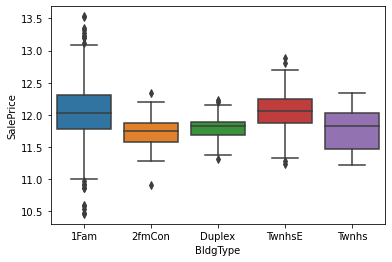

In [63]:
sns.boxplot(x='BldgType' , y = 'SalePrice' , data =df)
plt.show()

1 family building type - it has some of the highest prices as well as lowest.

# Now Lets Plot some numerical columns with respect to Sales Columns

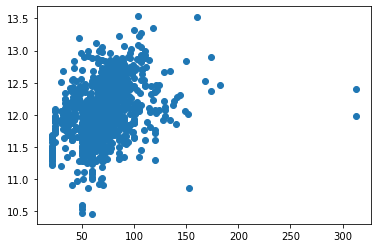

In [64]:
plt.scatter(x='LotFrontage',y='SalePrice',data=df)

So there seem to be to outliers here. But mostly as the frontage increases sale price also increases.

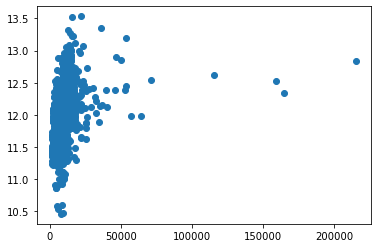

In [65]:
plt.scatter(x='LotArea',y='SalePrice',data=df)

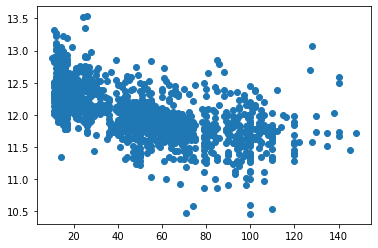

In [66]:
plt.scatter(x='YearBuilt',y='SalePrice',data=df)

There is a decreasing linear pattern here ofcourse with some exception

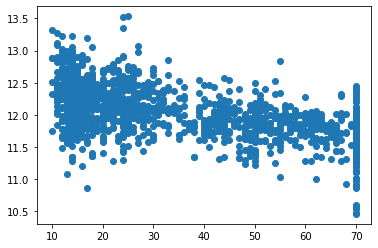

In [67]:
plt.scatter(x='YearRemodAdd',y='SalePrice',data=df)

Here we can also see the negative linearity. We better buy houses that are either built in last decade or 2.Or remoddeled in last decade. Nobody likes creaky houses.

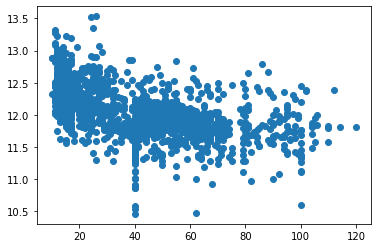

In [68]:
plt.scatter(x='GarageYrBlt',y='SalePrice',data=df)

Same decreasing linearity pattern.

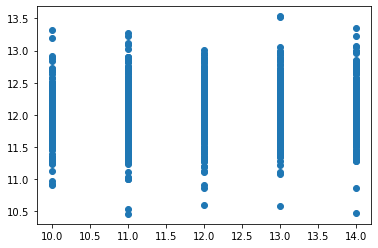

In [69]:
plt.scatter(x='YrSold',y='SalePrice',data=df)

Apart from YrSold We can say years do take a toll on houses prices.

In [70]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,17,17,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,17.0,RFn,2,548,0,61,0,0,0,0,0,12,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,44,44,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,44.0,RFn,2,460,298,0,0,0,0,0,0,13,WD,Normal,12.109011
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,19,18,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,19.0,RFn,2,608,0,42,0,0,0,0,0,12,WD,Normal,12.317167
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,105,50,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,22.0,Unf,3,642,0,35,272,0,0,0,0,14,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,20,20,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,20.0,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,12.429216


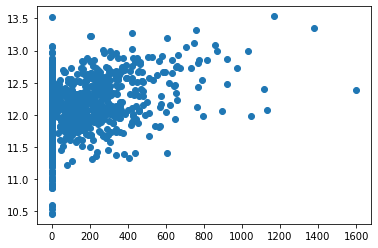

In [71]:
plt.scatter(x='MasVnrArea',y='SalePrice',data=df)

Positive Relation.

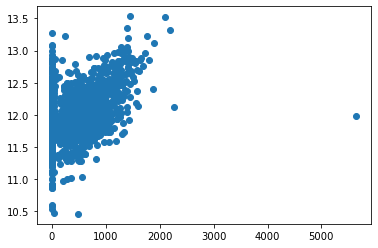

In [72]:
plt.scatter(x='BsmtFinSF1',y='SalePrice',data=df)

Positive.

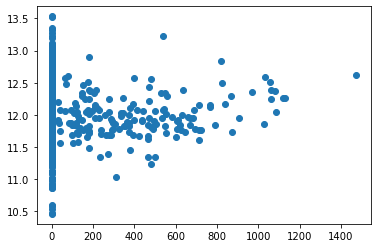

In [73]:
plt.scatter(x='BsmtFinSF2',y='SalePrice',data=df)

Somewhat Positive.

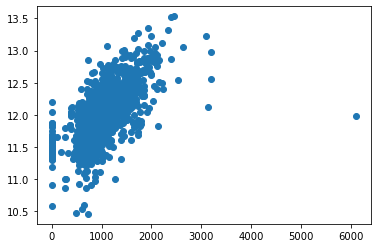

In [74]:
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=df)

Nice Positive.

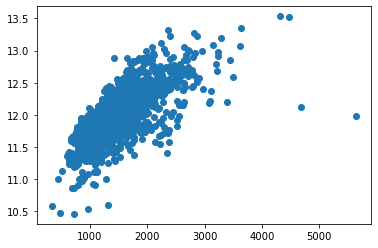

In [75]:
plt.scatter(x='GrLivArea',y='SalePrice',data=df)

Nice PosiTive Relationship.

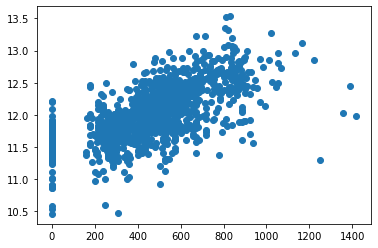

In [76]:
plt.scatter(x='GarageArea',y='SalePrice',data=df)

Almost all the numerical variable shows nice positive linear relationship.

### Above scatter plot indicates that we need linear regression techniques for predicting saleprice.

In [77]:
# Lets Confirm from pairplots and Heatplots.
# pairwise scatter plot
#plt.figure(figsize=(40, 20))
#sns.pairplot(df)
#plt.show()

In [78]:
cor = df.corr()

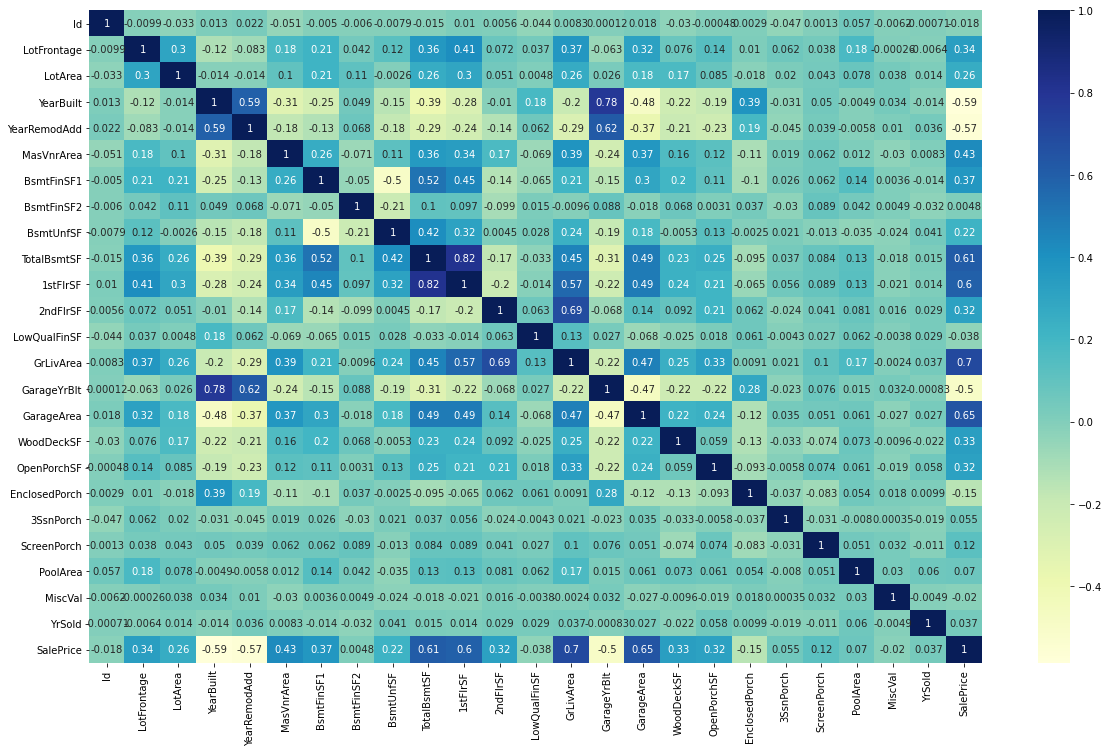

In [79]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,12))
sns.heatmap(cor,cmap="YlGnBu",annot=True)
plt.show()

we can see negative and positive correlation with respect to SalePrice.

# Outliers

We Wont be removing or capping any outliers for this analysis since we already tranformed our SalePrice Variable.
But Lets just check them.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   object 
 12  OverallCond    1460 non-null   object 
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [81]:
num = df.select_dtypes(include=['int64','float'])

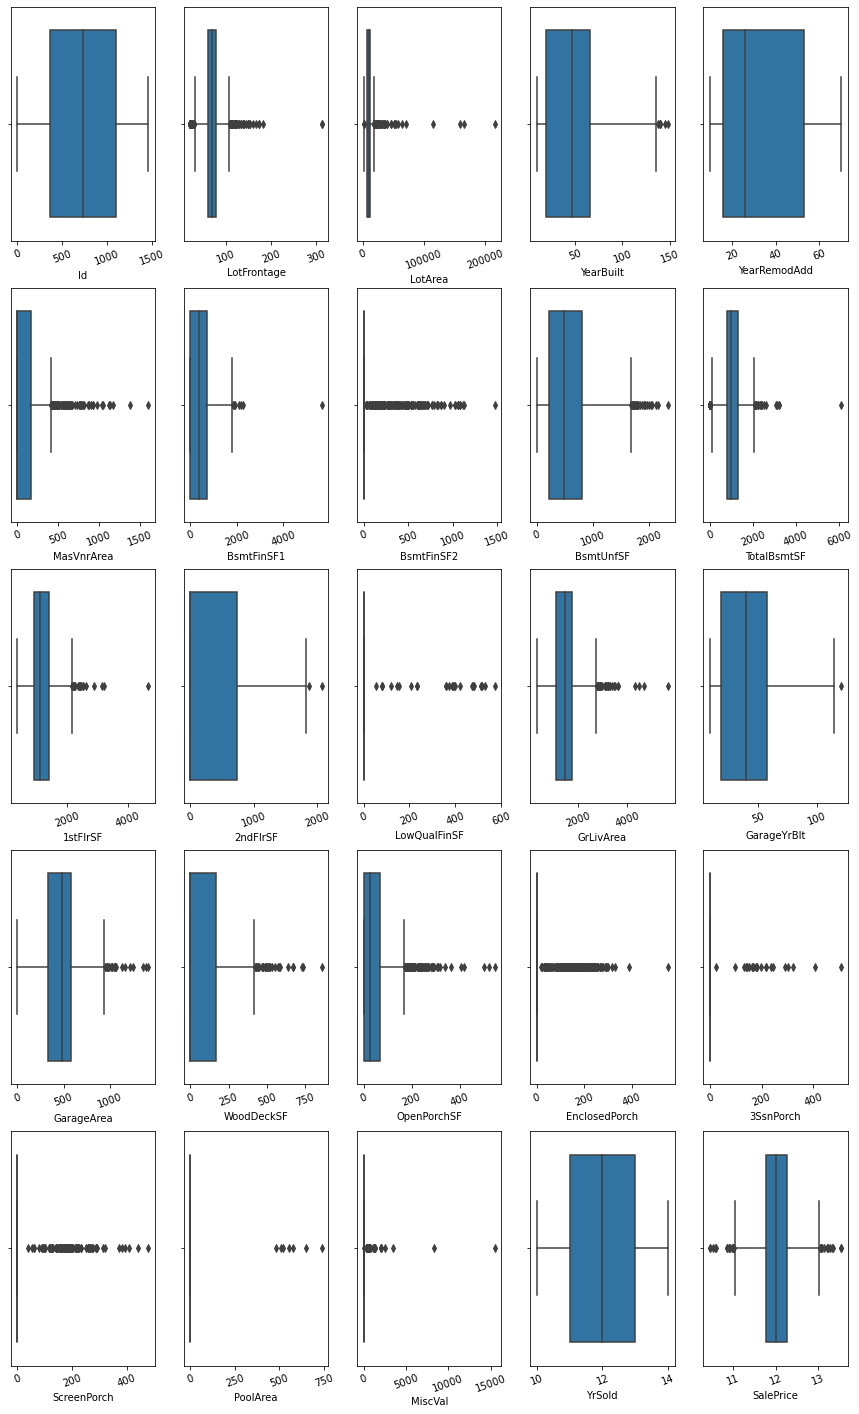

In [82]:
plt.figure(figsize=(15,25))
features = num.columns
for i in enumerate(features): 
    ax = plt.subplot(5, 5, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)

# Data Preparation

There were some binary columns which we coincidentally dropped since they were high skewed column. Like Street, CentralAir and Utilities.

So lets move on other variables and make them dummy columns.

In [83]:
cat = df.select_dtypes(include=object)

In [84]:
dummies = pd.get_dummies(df[cat.columns],drop_first=True)

In [85]:
final = pd.concat([df,dummies],axis=1)
final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_

In [86]:
final = final.drop(df[cat.columns],1)

In [87]:
final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,17,17,196.0,706,0,150,856,856,854,0,1710,17.0,548,0,61,0,0,0,0,0,

In [88]:
final.shape

(1460, 246)

In [89]:
# We will drop Id column also
final = final.drop('Id',1)

# Splitting DataSet

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = final.drop('SalePrice',1)

In [92]:
y=final['SalePrice']

In [93]:
X_train, X_test, y_train , y_test = train_test_split(X,y , train_size=.7,test_size=.3,random_state=24)

### Using Robust scaler as it is effective against outliers.

In [94]:
# Scaling Feature
from sklearn.preprocessing import RobustScaler

In [95]:
scaler = RobustScaler()

In [96]:
# Dropping sales price and Id from our numerical dataset
num.drop(['SalePrice','Id'],1,inplace=True)

#### Fit transforming numerical columns in our X_train data

In [97]:
X_train[num.columns] = scaler.fit_transform(X_train[num.columns])

In [98]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
486,0.50,0.170292,0.148936,0.710526,1.043478,0.595628,0.0,-0.409949,0.137097,-0.057471,0.0,0

#### Only transforming numerical columns on our X_test dataset.

In [99]:
X_test[num.columns] = scaler.transform(X_test[num.columns])

### Using Rfe for eliminating irrelevant features so that our model performance increases.

In [100]:
#Rfe
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

from sklearn.feature_selection import RFE
rfe = RFE(reg,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [101]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 135),
 ('LotArea', False, 149),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 93),
 ('MasVnrArea', False, 159),
 ('BsmtFinSF1', False, 77),
 ('BsmtFinSF2', False, 144),
 ('BsmtUnfSF', False, 76),
 ('TotalBsmtSF', False, 75),
 ('1stFlrSF', False, 105),
 ('2ndFlrSF', False, 128),
 ('LowQualFinSF', False, 145),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', False, 129),
 ('GarageArea', False, 156),
 ('WoodDeckSF', False, 120),
 ('OpenPorchSF', False, 142),
 ('EnclosedPorch', False, 165),
 ('3SsnPorch', False, 168),
 ('ScreenPorch', False, 163),
 ('PoolArea', False, 172),
 ('MiscVal', False, 175),
 ('YrSold', False, 152),
 ('MSSubClass_30', False, 55),
 ('MSSubClass_40', False, 5),
 ('MSSubClass_45', False, 69),
 ('MSSubClass_50', False, 107),
 ('MSSubClass_60', False, 17),
 ('MSSubClass_70', False, 106),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 80),
 ('MSSubClass_85', False, 44),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 36),
 ('MSSubClas

In [102]:
col=X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'GrLivArea', 'MSSubClass_75', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'BldgType_Duplex', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_Stucco',
       'Exterior2nd_CBlock', 'Exterior2nd_Stucco', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_Stone',
       'BsmtQual_No Basement', 'BsmtFinType1_No Basement',
       'BsmtFinType2_No Basement', 'BedroomAbvGr_8', 'TotRmsAbvGrd_3',
 

In [103]:
X_train = X_train[col]

In [104]:
X_test = X_test[col]

# Model Building

In [105]:
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Ridge

In [106]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
cv_results_ridge = pd.DataFrame(ridge_cv.cv_results_)
cv_results_ridge = cv_results_ridge
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003790,7.467353e-04,0.002193,0.000398,0.0001,{'alpha': 0.0001},-0.099842,-0.106306,-0.107040,-0.113695,-0.103124,-0.106001,0.004617,21,-0.092883,-0.094437,-0.095906,-0.092886,-0.093931,-0.094009,0.001124
1,0.004190,1.465318e-03,0.002592,0.000798,0.001,{'alpha': 0.001},-0.099841,-0.106294,-0.107043,-0.113674,-0.103115,-0.105993,0.004611,20,-0.092885,-0.094441,-0.095911,-0.092890,-0.093937,-0.094013,0.001125
2,0.002793,3.989936e-04,0.001795,0.000399,0.01,{'alpha': 0.01},-0.099833,-0.106178,-0.107069,-0.113469,-0.103028,-0.105915,0.004556,19,-0.092900,-0.094485,-0.095957,-0.092928,-0.093994,-0.094053,0.001132
3,0.002593,4.887529e-04,0.001795,0.000399,0.05,{'alpha': 0.05},-0.099900,-0.105829,-0.107142,-0.112730,-0.102675,-0.105655,0.004343,17,-0.092976,-0.094706,-0.096140,-0.093081,-0.094203,-0.094221,0.001163
4,0.002992,1.784161e-07,0.001397,0.000489,0.1,{'alpha': 0.1},-0.100031,-0.105584,-0.107170,-0.112156,-0.102302,-0.105449,0.004176,15,-0.093073,-0.094933,-0.096329,-0.093274,-0.094410,-0.094404,0.001186


In [108]:
#checking the value of optimum number of parameters
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 2.0}
-0.10496646214144814


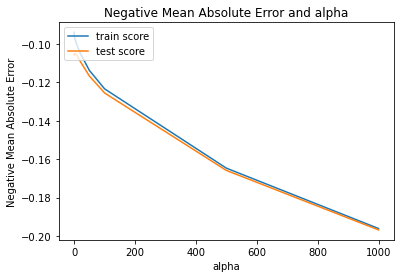

In [109]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.66723700e-01,  1.58243951e-01,  2.59421288e-02, -2.80655707e-02,
       -1.56876423e-01, -9.71009805e-02,  2.75669894e-01,  1.30575791e-01,
        2.24363834e-01,  1.21662044e-01, -4.37762520e-02,  1.42734517e-01,
        1.34602193e-01, -2.80655707e-02,  5.22621399e-02,  5.47949158e-03,
       -2.13578697e-01, -1.44776101e-01, -7.77655204e-02, -4.18836187e-02,
       -4.23051035e-03,  7.04483720e-02,  1.90480289e-01,  3.79492432e-01,
        1.76133881e-01, -2.01741268e-02, -1.77108465e-01, -7.39527021e-02,
       -2.60403824e-04,  4.23703043e-02,  1.06353750e-01,  1.22750613e-01,
        1.60753095e-01,  7.61411593e-02, -1.64535868e-01, -2.26733495e-02,
        6.65503332e-02, -2.26733495e-02, -1.08130205e-01, -2.56776381e-02,
        3.87909343e-02, -5.79097586e-02,  4.47964623e-02,  9.40300103e-02,
       -6.06389527e-02, -6.06389527e-02, -6.06389527e-02,  3.54304887e-02,
        3.40676268e-02, -1.77567641e-03,  3.92601899e-02,  5.23051874e-02,
        5.25097529e-02,  

In [111]:
ridge_coefs = pd.Series(ridge.coef_, index = X_train.columns)

In [112]:
ridge_coefs

YearBuilt                  -0.166724
GrLivArea                   0.158244
MSSubClass_75               0.025942
MSSubClass_90              -0.028066
MSSubClass_160             -0.156876
MSSubClass_180             -0.097101
MSZoning_FV                 0.275670
MSZoning_RH                 0.130576
MSZoning_RL                 0.224364
MSZoning_RM                 0.121662
LotConfig_FR3              -0.043776
Neighborhood_ClearCr        0.142735
Neighborhood_Crawfor        0.134602
BldgType_Duplex            -0.028066
HouseStyle_2.5Fin           0.052262
HouseStyle_2.5Unf           0.005479
OverallQual_2              -0.213579
OverallQual_3              -0.144776
OverallQual_4              -0.077766
OverallQual_5              -0.041884
OverallQual_6              -0.004231
OverallQual_7               0.070448
OverallQual_8               0.190480
OverallQual_9               0.379492
OverallQual_10              0.176134
OverallCond_2              -0.020174
OverallCond_3              -0.177108
O

In [113]:
ridge_top = ridge_coefs.sort_values(ascending=False)
ridge_top10 = ridge_top.iloc[:10]
ridge_top10

OverallQual_9           0.379492
MSZoning_FV             0.275670
MSZoning_RL             0.224364
OverallQual_8           0.190480
OverallQual_10          0.176134
OverallCond_9           0.160753
GrLivArea               0.158244
GarageCars_4            0.150730
Neighborhood_ClearCr    0.142735
Neighborhood_Crawfor    0.134602
dtype: float64

In [114]:
ridge_pred_train = ridge.predict(X_train)

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, ridge_pred_train)
r_squared = r2_score(y_train, ridge_pred_train)

In [116]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.019069058291310302
r_square_value : 0.8744430744115959


In [117]:
ridge_pred = ridge.predict(X_test)

In [118]:
mse = mean_squared_error(y_test, ridge_pred)
r_squared = r2_score(y_test, ridge_pred)

In [119]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.023364289897432312
r_square_value : 0.867959459730165


# Lasso

In [120]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [121]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)
cv_results_lasso = cv_results_lasso
cv_results_lasso.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022340,0.009536,0.002194,3.993989e-04,0.0001,{'alpha': 0.0001},-0.100703,-0.106180,-0.107783,-0.111182,-0.101521,-0.105474,0.003919,1,-0.093822,-0.095659,-0.097345,-0.094312,-0.095156,-0.095259,0.001223
1,0.005186,0.001715,0.002194,7.460089e-04,0.001,{'alpha': 0.001},-0.103632,-0.107920,-0.105637,-0.111312,-0.103765,-0.106453,0.002885,2,-0.099969,-0.100730,-0.102651,-0.100192,-0.100320,-0.100772,0.000971
2,0.003992,0.000888,0.002191,7.517424e-04,0.01,{'alpha': 0.01},-0.126649,-0.146147,-0.128877,-0.159374,-0.146648,-0.141539,0.012227,3,-0.143936,-0.138909,-0.143170,-0.137807,-0.138852,-0.140535,0.002507
3,0.003191,0.000747,0.001795,3.989458e-04,0.05,{'alpha': 0.05},-0.153910,-0.174083,-0.156483,-0.189019,-0.185206,-0.171740,0.014395,4,-0.173092,-0.173112,-0.175853,-0.168466,-0.168269,-0.171759,0.002946
4,0.002593,0.000489,0.001995,2.431402e-07,0.1,{'alpha': 0.1},-0.202190,-0.215457,-0.205171,-0.233202,-0.229730,-0.217150,0.012539,5,-0.217092,-0.217548,-0.221132,-0.213455,-0.215519,-0.216949,0.002535


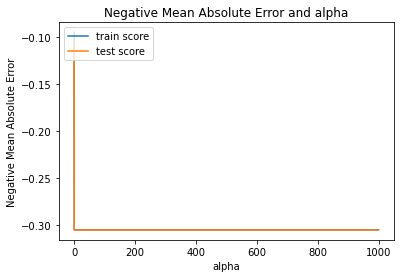

In [122]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [123]:
#checking the value of optimum number of parameters
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.1054736472009101


### Graph doesnt look good from best_param_ we got 0.0001 its either lower than that or maybe a little higher.

In [124]:
# cross validation
params = {'alpha': [0.0001 ,0.00015, 0.0002 ,0.00025,0.0003, 0.00035 ,0.0004
                    ,0.00045, 0.0005 , 0.00055 ,0.0006 ,0.00065, 0.0007,0.00075,0.0008,0.00085, 
                    0.0009,0.00095,0.001 ,0.005 ,0.01]}
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.00015, 0.0002, 0.00025, 0.0003,
                                   0.00035, 0.0004, 0.00045, 0.0005, 0.00055,
                                   0.0006, 0.00065, 0.0007, 0.00075, 0.0008,
                                   0.00085, 0.0009, 0.00095, 0.001, 0.005,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022141,0.010120,0.002194,0.000746,0.0001,{'alpha': 0.0001},-0.100703,-0.106180,-0.107783,-0.111182,-0.101521,-0.105474,0.003919,3,-0.093822,-0.095659,-0.097345,-0.094312,-0.095156,-0.095259,0.001223
1,0.011569,0.006232,0.001994,0.000631,0.00015,{'alpha': 0.00015},-0.100927,-0.106337,-0.107460,-0.110360,-0.101951,-0.105407,0.003511,2,-0.094392,-0.095996,-0.097625,-0.094721,-0.095902,-0.095727,0.001140
2,0.018750,0.009279,0.002194,0.000746,0.0002,{'alpha': 0.0002},-0.101059,-0.106225,-0.107223,-0.109969,-0.102026,-0.105300,0.003318,1,-0.094905,-0.096332,-0.097809,-0.095057,-0.096579,-0.096137,0.001069
3,0.006782,0.001163,0.001795,0.000399,0.00025,{'alpha': 0.00025},-0.101257,-0.106257,-0.107059,-0.109896,-0.103149,-0.105524,0.003029,4,-0.095525,-0.096659,-0.098042,-0.095205,-0.097138,-0.096514,0.001043
4,0.008577,0.002410,0.002199,0.000407,0.0003,{'alpha': 0.0003},-0.101415,-0.106257,-0.106874,-0.109795,-0.103806,-0.105629,0.002842,5,-0.096026,-0.096936,-0.098390,-0.095501,-0.097464,-0.096863,0.001025


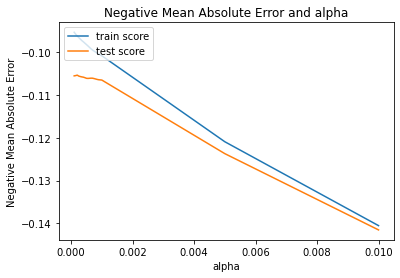

In [126]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [127]:
#checking the value of optimum number of parameters
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0002}
-0.10530044967392185


In [128]:
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [129]:
lasso.coef_

array([-1.60431398e-01,  1.59648507e-01,  1.79339245e-02, -4.44074128e-02,
       -1.61601532e-01, -9.21670228e-02,  3.76280368e-01,  2.27916141e-01,
        3.17962125e-01,  2.13151812e-01, -0.00000000e+00,  1.49646480e-01,
        1.33084580e-01, -8.24027103e-04,  3.95244995e-02,  0.00000000e+00,
       -2.92717773e-01, -8.19079301e-02, -0.00000000e+00,  3.72804757e-02,
        7.86116969e-02,  1.57708116e-01,  2.84265194e-01,  4.94490336e-01,
        2.93933468e-01, -0.00000000e+00, -1.56394830e-01, -7.11837163e-02,
       -0.00000000e+00,  4.33375849e-02,  1.07851686e-01,  1.21829556e-01,
        1.69563976e-01,  4.17915060e-02, -3.44488756e-01, -0.00000000e+00,
        5.16211358e-02, -0.00000000e+00, -1.06202406e-01, -2.77395473e-02,
        1.14175730e-03, -7.21301424e-03,  9.43416304e-03,  9.31307761e-02,
       -1.80395097e-01, -6.08667850e-17, -1.41550663e-18,  0.00000000e+00,
        0.00000000e+00, -3.33281633e-02, -0.00000000e+00,  1.13634563e-02,
        1.07212226e-02,  

### Making a pandas series for better look on our coefficients.

In [130]:
lasso_coefs = pd.Series(lasso.coef_, index = X_train.columns)

In [131]:
top_lasso = lasso_coefs.sort_values(ascending=False)
top_10_lasso = top_lasso.iloc[:10]
top_10_lasso

OverallQual_9     0.494490
MSZoning_FV       0.376280
MSZoning_RL       0.317962
OverallQual_10    0.293933
OverallQual_8     0.284265
MSZoning_RH       0.227916
MSZoning_RM       0.213152
GarageCars_4      0.208806
OverallCond_9     0.169564
GrLivArea         0.159649
dtype: float64

# Evaluating Lasso Model

In [132]:
lasso_pred_train = lasso.predict(X_train)

In [133]:
mse = mean_squared_error(y_train, lasso_pred_train)
r_squared = r2_score(y_train, lasso_pred_train)

In [134]:
print('Mean Squared Error is',mse)
print('R_squared is', r_squared)

Mean Squared Error is 0.018594440080630183
R_squared is 0.8775681161651481


In [135]:
lasso_pred_test = lasso.predict(X_test)

In [136]:
mse = mean_squared_error(y_test, lasso_pred_test)
r_squared = r2_score(y_test, lasso_pred_test)

In [137]:
print('Mean Squared Error is',mse)
print('R_squared is',r_squared)

Mean Squared Error is 0.023063535135163127
R_squared is 0.8696591399461305


# Subjective Questions

# Question 1

## What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Builing Ridge And Lasso Model with double the values of alpha.

## Ridge Regression

In [138]:
alpha_double = 4
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-0.1687421 ,  0.15804125,  0.02854498, -0.02888263, -0.14818833,
       -0.07571432,  0.20673571,  0.06942302,  0.16213265,  0.05948967,
       -0.0226435 ,  0.12948816,  0.12805422, -0.02888263,  0.04092722,
       -0.00309827, -0.14530845, -0.14296663, -0.09839594, -0.06320063,
       -0.02663322,  0.04620741,  0.15980668,  0.32764831,  0.1215928 ,
       -0.03474221, -0.17990786, -0.07914564, -0.00602476,  0.03341023,
        0.09815193,  0.11322468,  0.1392971 ,  0.04728449, -0.09766152,
       -0.01436065,  0.04334757, -0.01436065, -0.08044182, -0.03888114,
        0.03677646, -0.03812514,  0.04022982,  0.07238838, -0.05963154,
       -0.05963154, -0.05963154,  0.02429137,  0.01339271, -0.01552128,
        0.02646066,  0.0387765 ,  0.04008861,  0.06044086,  0.03104431,
        0.04680627, -0.0801978 , -0.09109536,  0.02429137,  0.02144644,
        0.11214019, -0.10452435, -0.02906227, -0.10680792, -0.10680792,
       -0.09945336, -0.02372812,  0.11526212,  0.11472729,  0.04

In [139]:
ridge_coefs_double = pd.Series(ridge_double.coef_, index = X_train.columns)

In [140]:
top_double = ridge_coefs_double.sort_values(ascending=False)
top_double_10 = top_double.iloc[:10]
top_double_10

OverallQual_9           0.327648
MSZoning_FV             0.206736
MSZoning_RL             0.162133
OverallQual_8           0.159807
GrLivArea               0.158041
OverallCond_9           0.139297
Neighborhood_ClearCr    0.129488
Neighborhood_Crawfor    0.128054
OverallQual_10          0.121593
GarageCars_3            0.115262
dtype: float64

### Lasso Regression on double the value of Alpha

In [141]:
alpha_double = 0.0004

lasso_double = Lasso(alpha=alpha_double)
        
lasso_double.fit(X_train, y_train) 

Lasso(alpha=0.0004)

In [142]:
lasso_double.coef_

array([-1.61033804e-01,  1.61265640e-01,  1.05988075e-02, -3.98573584e-02,
       -1.53495305e-01, -5.89511889e-02,  2.56026331e-01,  9.39263802e-02,
        2.03115094e-01,  9.63270415e-02, -0.00000000e+00,  1.36455561e-01,
        1.24061656e-01, -3.22405607e-04,  1.46409858e-02,  0.00000000e+00,
       -2.15403475e-01, -1.03942720e-01, -3.85434801e-02, -0.00000000e+00,
        4.11984341e-02,  1.19537687e-01,  2.40927625e-01,  4.42373078e-01,
        2.18044182e-01, -0.00000000e+00, -1.82423390e-01, -6.91667558e-02,
       -0.00000000e+00,  3.91429130e-02,  1.04726388e-01,  1.19041960e-01,
        1.59820563e-01,  0.00000000e+00, -1.01458838e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -4.68826816e-02, -4.77739597e-02,
        0.00000000e+00, -0.00000000e+00,  5.13054139e-03,  3.94046345e-02,
       -1.66783728e-01, -4.81272254e-17, -8.49303977e-18,  0.00000000e+00,
       -0.00000000e+00, -3.33256865e-02, -0.00000000e+00,  8.76251248e-03,
        8.91770880e-03,  

In [143]:
lasso_double_coefs = pd.Series(lasso_double.coef_,index = X_train.columns)

In [144]:
top_double = lasso_double_coefs.sort_values(ascending=False)
top_double_10 = top_double.iloc[:10]
top_double_10

OverallQual_9           0.442373
MSZoning_FV             0.256026
OverallQual_8           0.240928
OverallQual_10          0.218044
MSZoning_RL             0.203115
GrLivArea               0.161266
OverallCond_9           0.159821
GarageCars_4            0.152831
Neighborhood_ClearCr    0.136456
GarageCars_3            0.127860
dtype: float64

# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

# Lasso Regression For Subjective Question 3.

In [145]:
top_10_lasso.head()

OverallQual_9     0.494490
MSZoning_FV       0.376280
MSZoning_RL       0.317962
OverallQual_10    0.293933
OverallQual_8     0.284265
dtype: float64

### Question states that top 5 variables are not available so what will be our top 5 variable now.

In [146]:
# Removing top 5 variables from X_train and y_train.
X_train_new = X_train.drop(['OverallQual_9','MSZoning_FV','MSZoning_RL','OverallQual_10','OverallQual_8'],axis=1)
X_test_new = X_test[X_train_new.columns]

# Lasso Regression

In [147]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015758,0.003753,0.001995,0.000631,0.0001,{'alpha': 0.0001},-0.107574,-0.110385,-0.105195,-0.115498,-0.110514,-0.109833,0.003449,1,-0.098341,-0.098871,-0.102554,-0.099253,-0.100130,-0.099830,0.001482
1,0.006184,0.002130,0.002394,0.000798,0.001,{'alpha': 0.001},-0.110519,-0.113092,-0.104781,-0.116035,-0.107924,-0.110470,0.003916,2,-0.104273,-0.104550,-0.108246,-0.105052,-0.104129,-0.105250,0.001531
2,0.003993,0.000631,0.002789,0.000397,0.01,{'alpha': 0.01},-0.127315,-0.148146,-0.130868,-0.160174,-0.148077,-0.142916,0.012169,3,-0.144982,-0.140057,-0.144999,-0.139769,-0.139389,-0.141839,0.002582
3,0.003990,0.000892,0.001995,0.000630,0.05,{'alpha': 0.05},-0.153910,-0.174083,-0.156483,-0.189019,-0.185206,-0.171740,0.014395,4,-0.173092,-0.173112,-0.175853,-0.168466,-0.168269,-0.171759,0.002946
4,0.002788,0.000396,0.001795,0.000399,0.1,{'alpha': 0.1},-0.202190,-0.215457,-0.205171,-0.233202,-0.229730,-0.217150,0.012539,5,-0.217092,-0.217548,-0.221132,-0.213455,-0.215519,-0.216949,0.002535


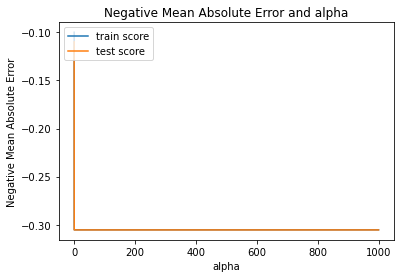

In [149]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [150]:
# cross validation
params = {'alpha': [0.0001 ,0.00015, 0.0002 ,0.00025,0.0003, 0.00035 ,0.0004
                    ,0.00045, 0.0005 , 0.00055 ,0.0006 ,0.00065, 0.0007,0.00075,0.0008,0.00085, 
                    0.0009,0.00095,0.001 ,0.005 ,0.01]}
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.00015, 0.0002, 0.00025, 0.0003,
                                   0.00035, 0.0004, 0.00045, 0.0005, 0.00055,
                                   0.0006, 0.00065, 0.0007, 0.00075, 0.0008,
                                   0.00085, 0.0009, 0.00095, 0.001, 0.005,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [151]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014960,0.004232,0.002394,0.000798,0.0001,{'alpha': 0.0001},-0.107574,-0.110385,-0.105195,-0.115498,-0.110514,-0.109833,0.003449,9,-0.098341,-0.098871,-0.102554,-0.099253,-0.100130,-0.099830,0.001482
1,0.006981,0.001784,0.002194,0.000399,0.00015,{'alpha': 0.00015},-0.107850,-0.110267,-0.105077,-0.115208,-0.109888,-0.109658,0.003331,4,-0.098861,-0.099274,-0.102832,-0.099529,-0.100694,-0.100238,0.001433
2,0.007979,0.003154,0.001795,0.000399,0.0002,{'alpha': 0.0002},-0.108035,-0.110412,-0.104938,-0.114993,-0.109386,-0.109553,0.003285,2,-0.099255,-0.099625,-0.103147,-0.099673,-0.101155,-0.100571,0.001443
3,0.005785,0.001934,0.001596,0.000489,0.00025,{'alpha': 0.00025},-0.108426,-0.110644,-0.104700,-0.114889,-0.109094,-0.109551,0.003308,1,-0.099696,-0.099948,-0.103528,-0.099903,-0.101484,-0.100912,0.001456
4,0.006582,0.002239,0.001396,0.000489,0.0003,{'alpha': 0.0003},-0.108709,-0.110706,-0.104605,-0.114793,-0.109228,-0.109608,0.003289,3,-0.100039,-0.100277,-0.103962,-0.100182,-0.101811,-0.101254,0.001498


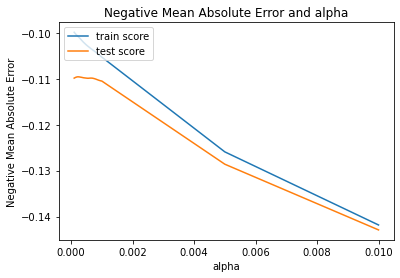

In [152]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [153]:
#checking the value of optimum number of parameters
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.00025}
-0.10955067310825817


In [154]:
alpha = 0.00025

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.00025)

In [155]:
lasso.coef_

array([-1.82123698e-01,  1.56278090e-01,  2.21179482e-02, -5.22610860e-02,
       -1.52817184e-01, -9.51424112e-02, -2.48933855e-02, -9.01593131e-02,
        0.00000000e+00,  1.46310856e-01,  1.39258757e-01, -1.92265440e-03,
        2.86221470e-02, -0.00000000e+00, -8.21759020e-01, -3.76383973e-01,
       -2.84021178e-01, -2.43578779e-01, -2.07467607e-01, -1.33636733e-01,
       -0.00000000e+00, -1.71333988e-01, -7.36509477e-02,  0.00000000e+00,
        4.12989773e-02,  1.08952590e-01,  1.30328309e-01,  1.74037890e-01,
        1.54093782e-02, -2.12396782e-01, -0.00000000e+00,  8.74331584e-02,
       -0.00000000e+00, -1.12721252e-01, -8.68015971e-02,  0.00000000e+00,
       -0.00000000e+00,  1.34611391e-02,  3.48054106e-02, -1.81038916e-01,
       -1.98170928e-17, -2.83101326e-18,  0.00000000e+00, -0.00000000e+00,
       -2.56329386e-02,  8.52745850e-03,  2.01748818e-02,  1.57966841e-02,
        4.45643685e-02,  0.00000000e+00,  2.92729897e-02, -5.99204710e-02,
       -1.37760391e-01,  

In [156]:
lasso_coefs_new = pd.Series(lasso.coef_, index = X_train_new.columns)

In [157]:
lasso_coefs_new.sort_values(ascending=False)

GarageCars_4                2.102330e-01
OverallCond_9               1.740379e-01
GarageCars_3                1.586726e-01
GrLivArea                   1.562781e-01
Neighborhood_ClearCr        1.463109e-01
Neighborhood_Crawfor        1.392588e-01
OverallCond_8               1.303283e-01
Fireplaces_2                1.301110e-01
OverallCond_7               1.089526e-01
Exterior1st_Stucco          8.743316e-02
TotRmsAbvGrd_8              4.456437e-02
OverallCond_6               4.129898e-02
Foundation_Stone            3.480541e-02
Fireplaces_1                3.142534e-02
TotRmsAbvGrd_10             2.927299e-02
HouseStyle_2.5Fin           2.862215e-02
SaleType_Con                2.776406e-02
MSSubClass_75               2.211795e-02
TotRmsAbvGrd_6              2.017488e-02
TotRmsAbvGrd_7              1.579668e-02
RoofStyle_Shed              1.540938e-02
ExterCond_TA                1.346114e-02
TotRmsAbvGrd_5              8.527458e-03
ExterCond_Gd                0.000000e+00
OverallCond_5   

In [158]:
top_new = lasso_coefs_new.sort_values(ascending=False)
top5_new = top_new.iloc[:5]
top5_new.head()

GarageCars_4            0.210233
OverallCond_9           0.174038
GarageCars_3            0.158673
GrLivArea               0.156278
Neighborhood_ClearCr    0.146311
dtype: float64